In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

### Content

#### Attributes

1) age: age in years  
2) sex: sex (1 = male; 0 = female)  
3) cp: chest pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5) chol: serum cholestoral in mg/dl  
6) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
7) restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8) thalach: maximum heart rate achieved  
9) exang: exercise induced angina (1 = yes; 0 = no)  
10) oldpeak = ST depression induced by exercise relative to rest  
11) slope: the slope of the peak exercise ST segment
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping
12) ca: number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

#### Labels

condition: 
- 0 = no disease
- 1 = disease

### Dataset characteristics

In [62]:
DATA_PATH = 'heart_cleveland_upload.csv'

In [63]:
df = pd.read_csv(DATA_PATH)

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [65]:
df.shape

(297, 14)

In [66]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [67]:
print((df.isnull()).sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [68]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Data visualization

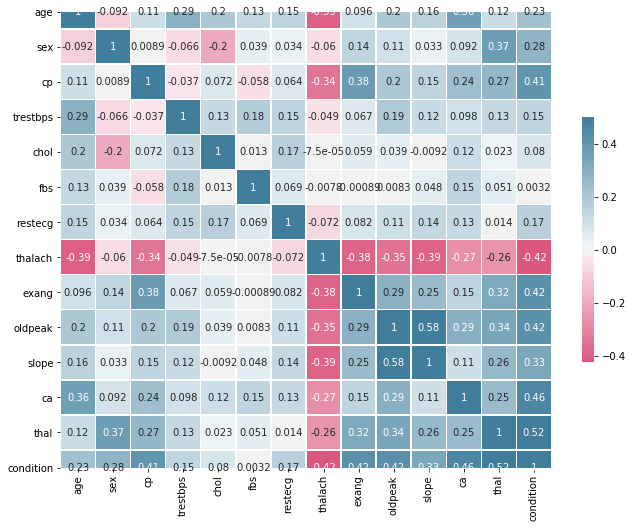

In [84]:
f, ax = plt.subplots(figsize=(11, 9))
custom_colormap = sns.diverging_palette(0, 230, as_cmap=True)

sns.heatmap(df.corr(), cmap=custom_colormap, vmax=.5, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

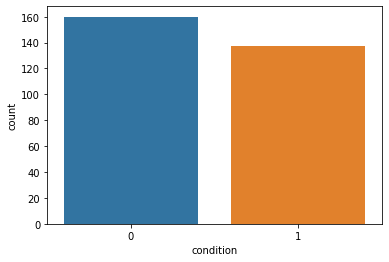

In [70]:
sns.countplot(x='condition', data=df);

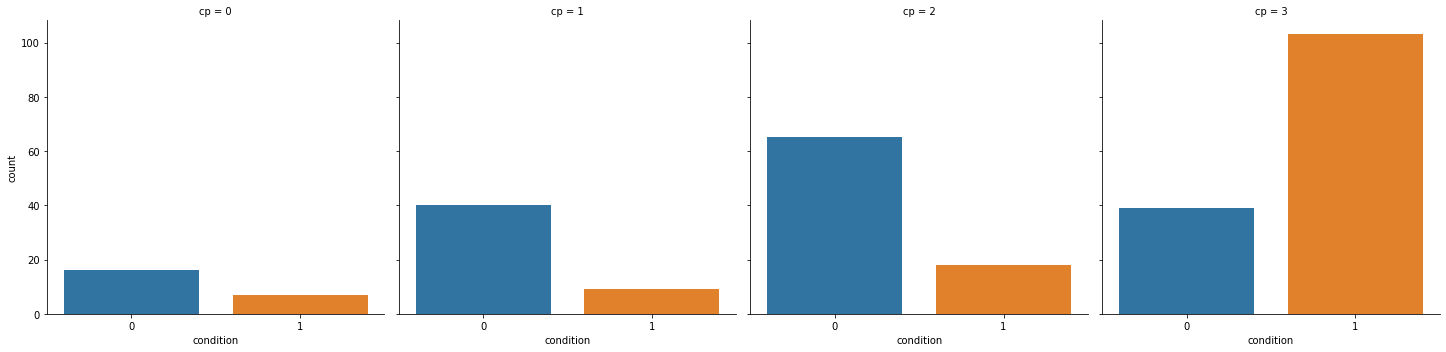

In [81]:
sns.factorplot(x='condition', col='cp', kind='count', data=df);

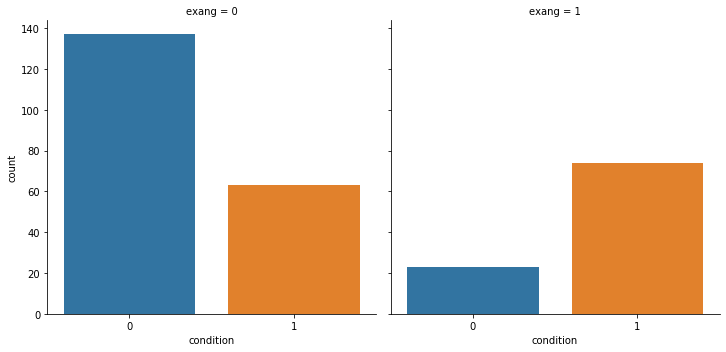

In [73]:
sns.factorplot(x='condition', col='exang', kind='count', data=df);

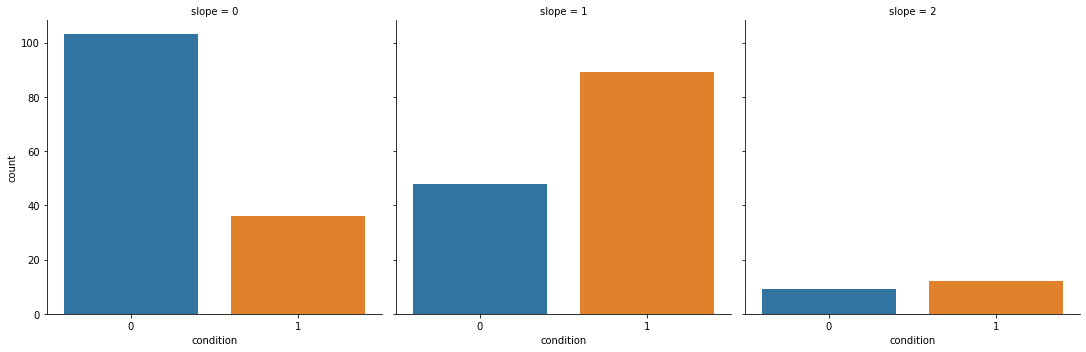

In [75]:
sns.factorplot(x='condition', col='slope', kind='count', data=df);

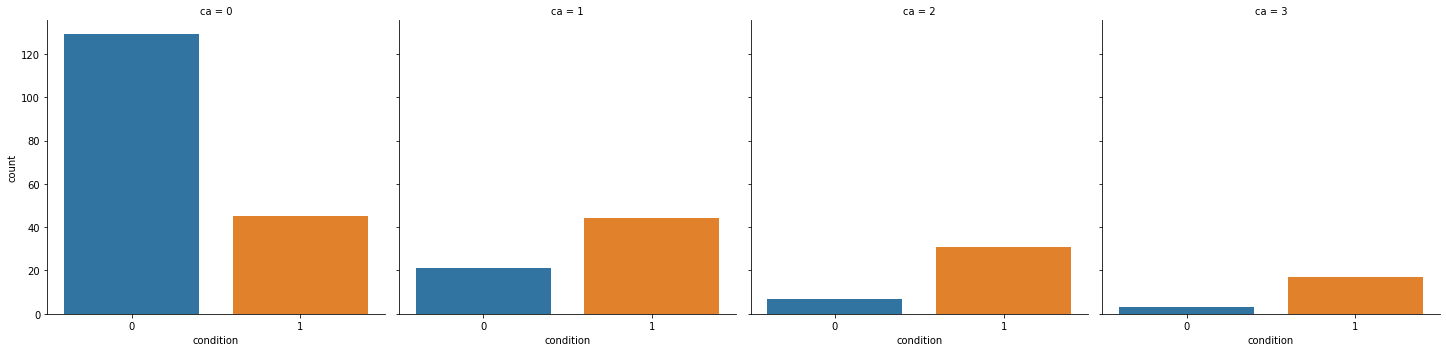

In [76]:
sns.factorplot(x='condition', col='ca', kind='count', data=df);

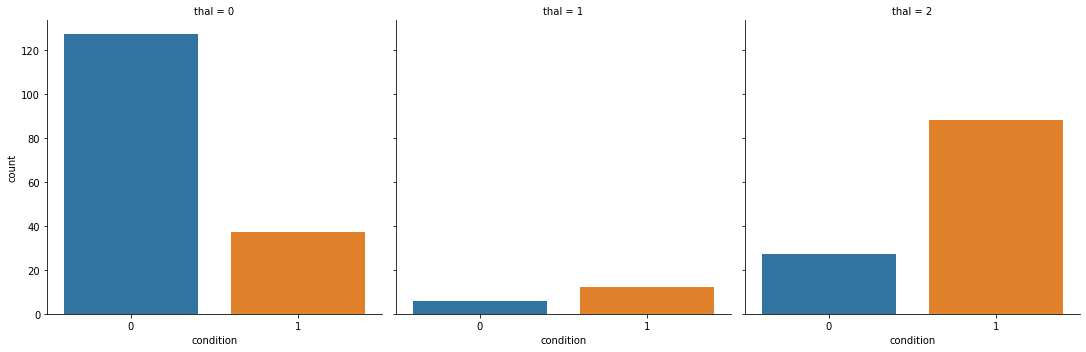

In [77]:
sns.factorplot(x='condition', col='thal', kind='count', data=df);

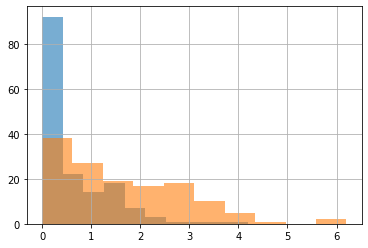

In [79]:
df.groupby('condition').oldpeak.hist(alpha=0.6);

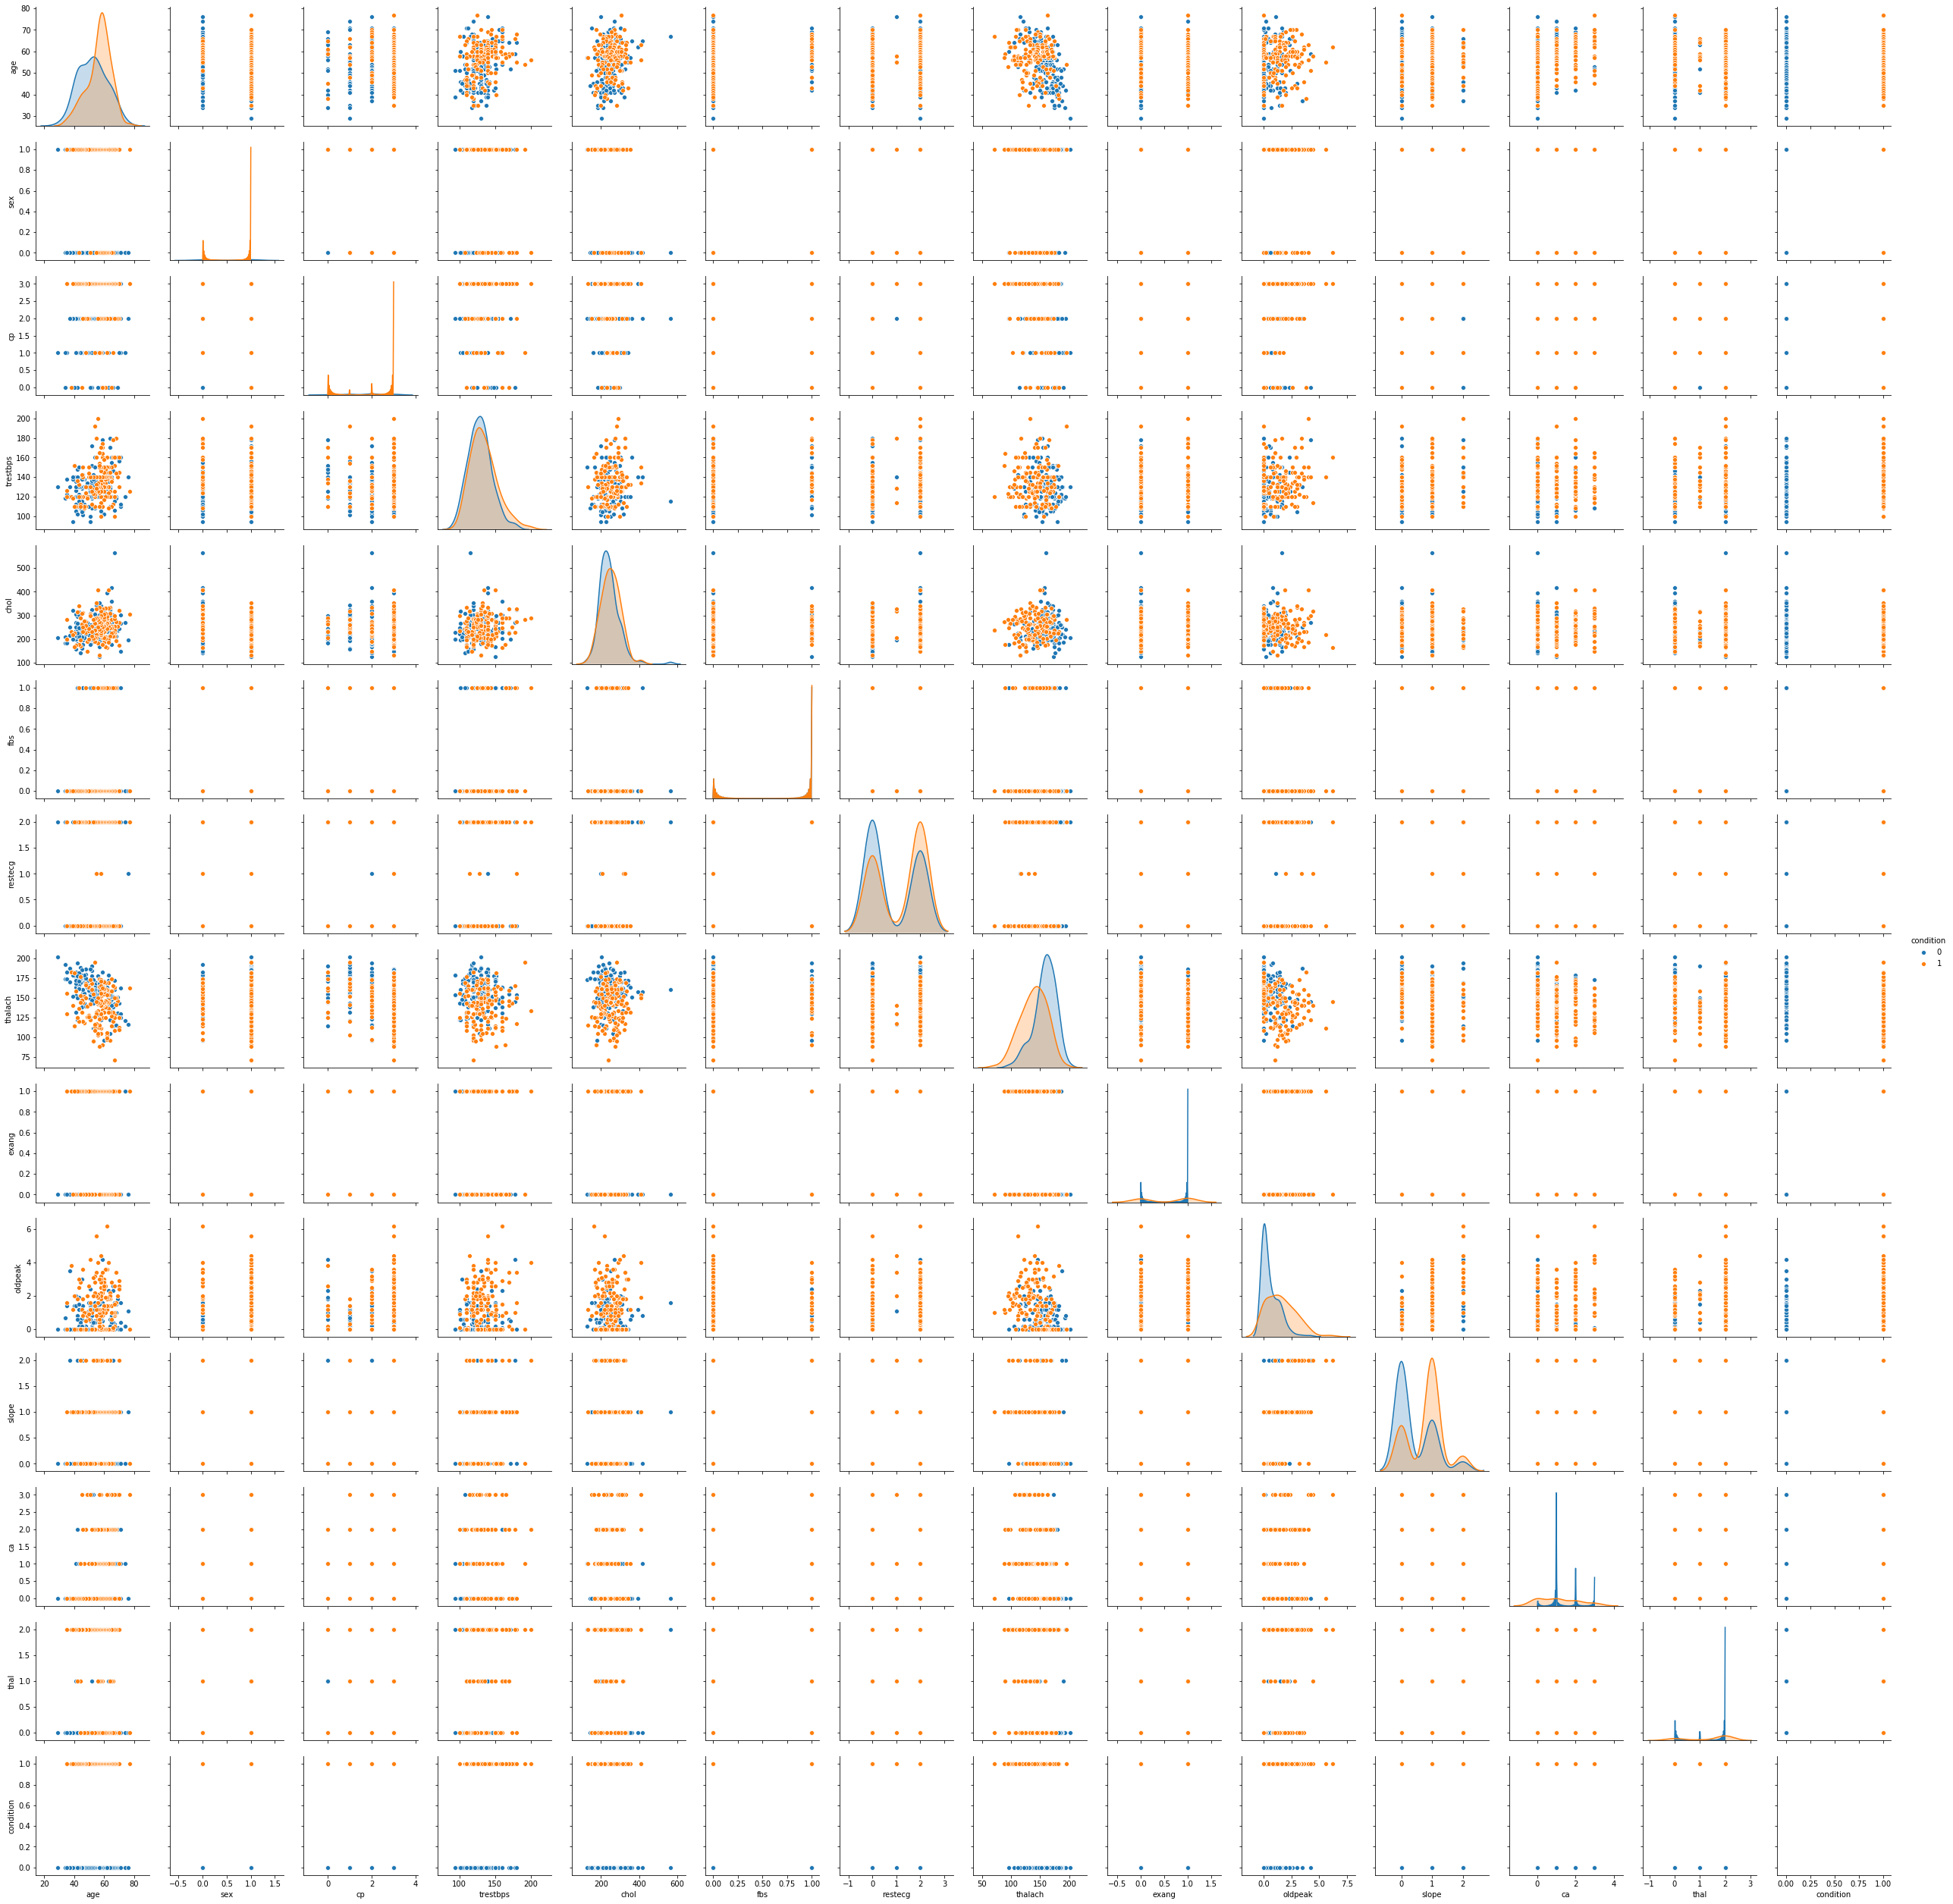

In [86]:
sns.pairplot(df, hue='condition')